In [37]:
from feat import Detector
from feat.utils.io import get_test_data_path
from feat.plotting import imshow
import seaborn as sns
import numpy as np
import os

# Detect from Images

In [2]:
detector = Detector()
detector

Detector(face_model=img2pose, landmark_model=mobilefacenet, au_model=xgb, emotion_model=resmasknet, facepose_model=img2pose, identity_model=facenet)

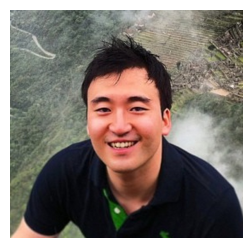

In [4]:
test_data_dir = get_test_data_path()
single_face_img_path = os.path.join(test_data_dir, "single_face.jpg")

imshow(single_face_img_path)

In [5]:
single_face_prediction = detector.detect(single_face_img_path, data_type="image")
print(type(single_face_prediction)) # instance of a Fex class

single_face_prediction

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.16it/s]

<class 'feat.data.Fex'>


,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,Identity_508,Identity_509,Identity_510,Identity_511,Identity_512,input,frame,FrameHeight,FrameWidth,Identity
0,163.0,131.0,246.0,307.0,0.999693,188.409531,190.76413,193.926575,197.980225,206.38916,...,0.0302,0.10436,-0.00073,-0.014038,0.044818,/Users/amizukam/anaconda3/envs/fer/lib/python3...,0,562.0,572.0,Person_0


In [6]:
single_face_prediction.faceboxes

,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore
0,163.0,131.0,246.0,307.0,0.999693


In [7]:
single_face_prediction.aus

,AU01,AU02,AU04,AU05,AU06,AU07,AU09,AU10,AU11,AU12,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
0,0.292286,0.352024,0.092464,0.323836,0.859788,1.0,0.375797,0.009637,1.0,0.920121,0.643604,0.056617,0.371272,1.0,0.113789,0.207406,0.996272,0.243547,0.029547,0.645135


In [8]:
single_face_prediction.emotions

,anger,disgust,fear,happiness,sadness,surprise,neutral
0,0.000315,0.00002,0.000017,0.992122,0.006474,0.000746,0.000306


In [10]:
single_face_prediction.poses

,Pitch,Roll,Yaw,X,Y,Z
0,0.153656,0.146084,-0.032639,-0.025715,0.136259,8.532812


In [11]:
os.makedirs("output", exist_ok=True)
single_face_prediction.to_csv("output/sample_output.csv", index=False)

In [12]:
from feat.utils.io import read_feat

input_prediction = read_feat("output/sample_output.csv")

input_prediction.aus

,AU01,AU02,AU04,AU05,AU06,AU07,AU09,AU10,AU11,AU12,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
0,0.292286,0.352024,0.092464,0.323836,0.859788,1.0,0.375797,0.009637,1.0,0.920121,0.643604,0.056617,0.371272,1.0,0.113789,0.207406,0.996272,0.243547,0.029547,0.645135


In [13]:
# Real-time saving
fex = detector.detect(inputs=single_face_img_path, data_type="image", save="output/detections.csv")
fex.head()

100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.44s/it]


,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,Identity_508,Identity_509,Identity_510,Identity_511,Identity_512,input,frame,FrameHeight,FrameWidth,Identity
0,163.0,131.0,246.0,307.0,0.999693,188.40953,190.76413,193.92657,197.98022,206.38916,...,0.0302,0.10436,-0.00073,-0.014038,0.044818,/Users/amizukam/anaconda3/envs/fer/lib/python3...,0,562.0,572.0,Person_0


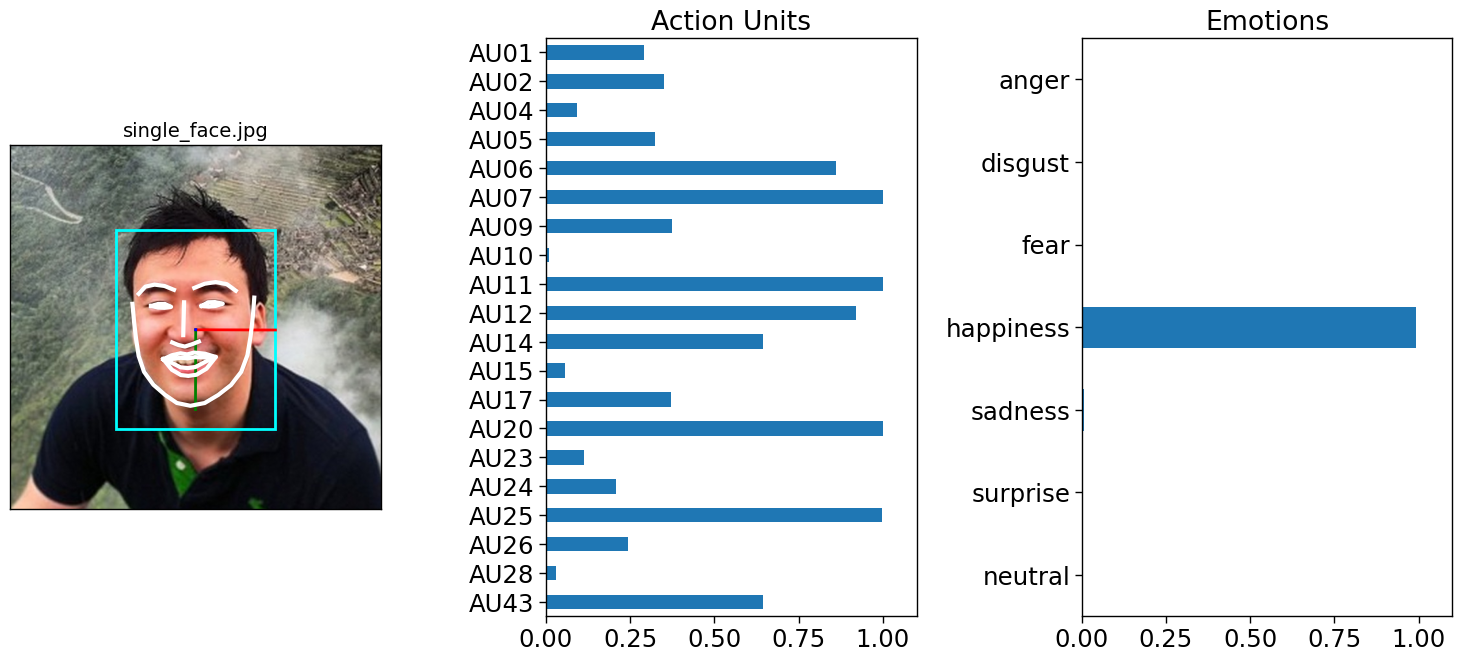

In [14]:
figs = single_face_prediction.plot_detections(poses=True)

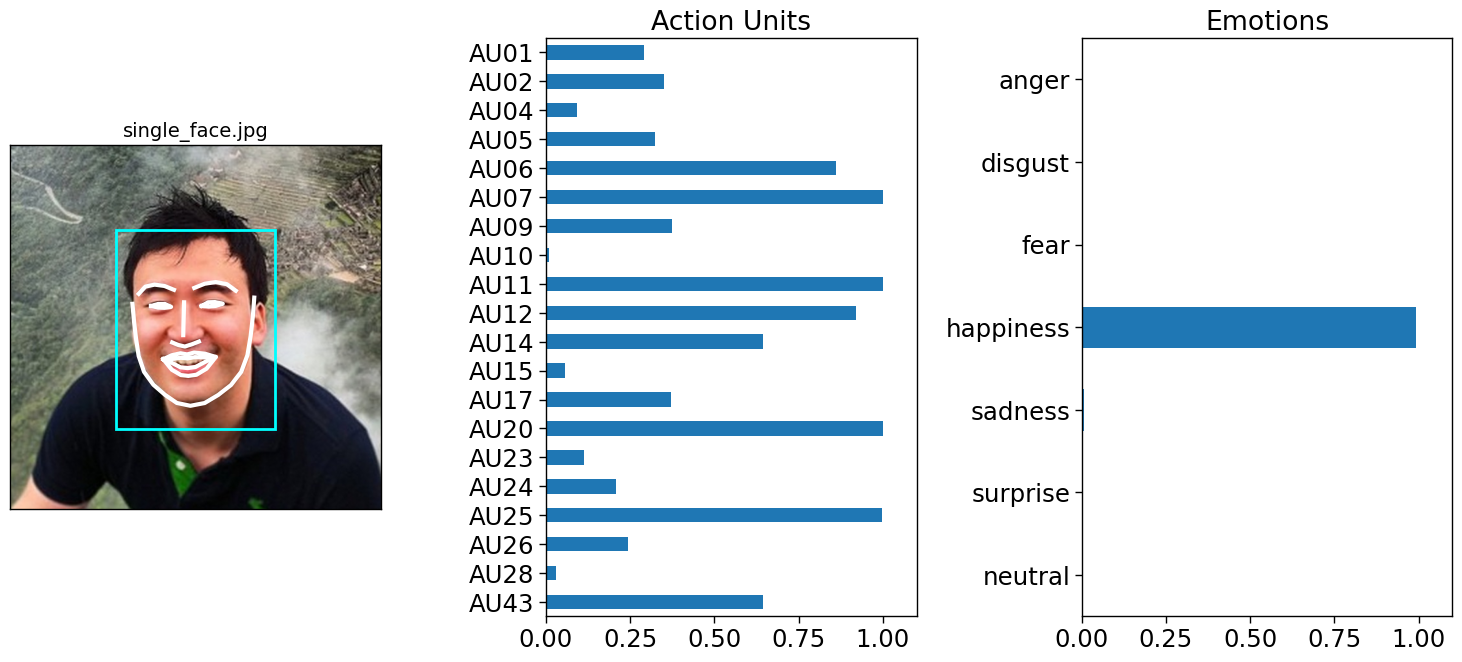

In [40]:
figs = single_face_prediction.plot_detections(poses=False)

100%|██████████████████████████████████████| 24.6M/24.6M [00:06<00:00, 4.00MB/s]
100%|██████████████████████████████████████| 20.5M/20.5M [00:04<00:00, 4.16MB/s]


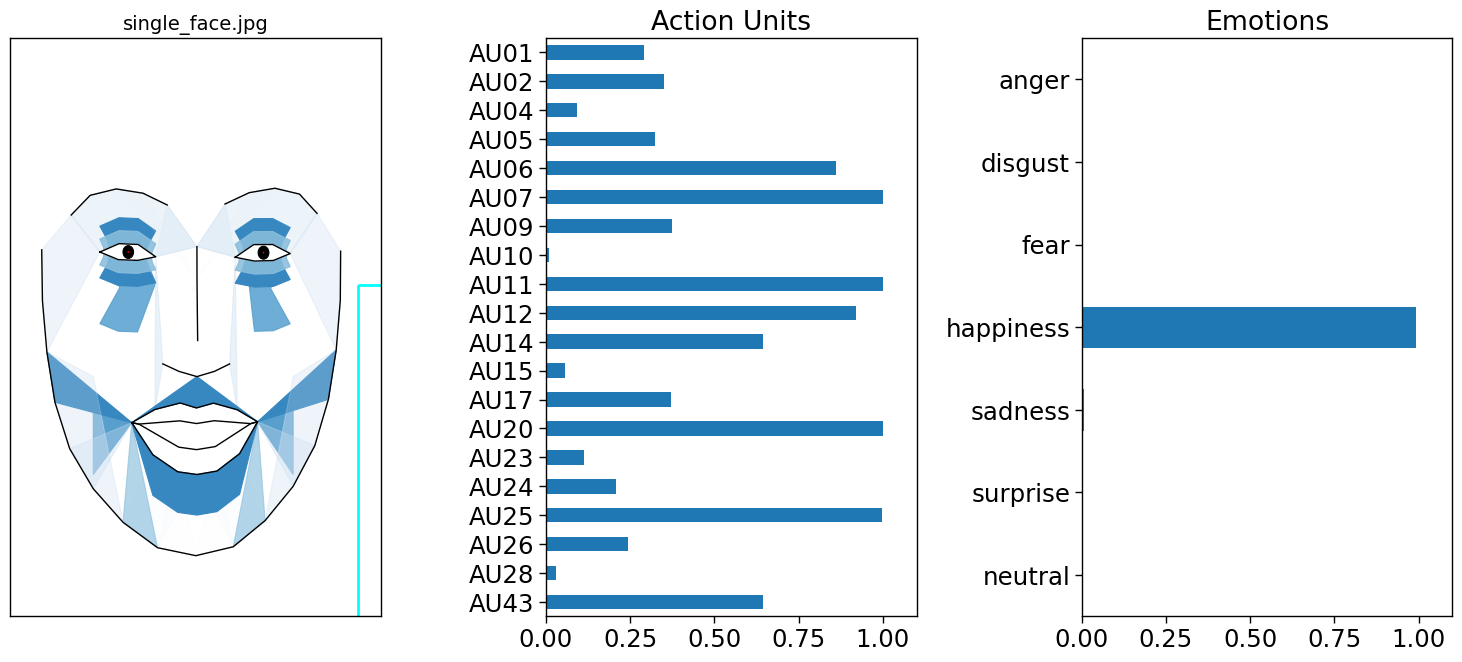

In [20]:
figs = single_face_prediction.plot_detections(faces="aus", muscles=True)

In [23]:
multi_face_image_path = os.path.join(test_data_dir, "multi_face.jpg")
multi_face_image_prediction = detector.detect(multi_face_image_path, data_type="image")

multi_face_image_prediction

100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.85s/it]


,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,Identity_508,Identity_509,Identity_510,Identity_511,Identity_512,input,frame,FrameHeight,FrameWidth,Identity
0,663.0,263.0,150.0,180.0,0.998755,683.637024,682.256287,681.580444,682.637024,686.754944,...,-0.030578,0.057009,-0.027664,0.055146,0.074115,/Users/amizukam/anaconda3/envs/fer/lib/python3...,0,667.0,1000.0,Person_0
1,512.0,284.0,140.0,172.0,0.997860,532.246399,530.987976,530.478943,531.346313,534.563416,...,0.020770,0.074040,-0.061894,0.024235,0.058015,/Users/amizukam/anaconda3/envs/fer/lib/python3...,0,667.0,1000.0,Person_1
2,290.0,215.0,135.0,160.0,0.991971,311.675385,313.203674,315.590179,319.633240,326.428802,...,-0.065147,-0.021230,-0.057268,-0.008089,0.035251,/Users/amizukam/anaconda3/envs/fer/lib/python3...,0,667.0,1000.0,Person_2
3,192.0,35.0,131.0,154.0,0.963654,216.397369,214.710068,213.856934,214.397079,217.525269,...,0.040147,0.028400,-0.029841,0.040843,-0.055877,/Users/amizukam/anaconda3/envs/fer/lib/python3...,0,667.0,1000.0,Person_3
4,413.0,193.0,112.0,134.0,0.903046,435.238007,435.729736,436.857910,439.002228,442.800690,...,0.042136,0.047004,-0.001307,0.041147,0.046738,/Users/amizukam/anaconda3/envs/fer/lib/python3...,0,667.0,1000.0,Person_4


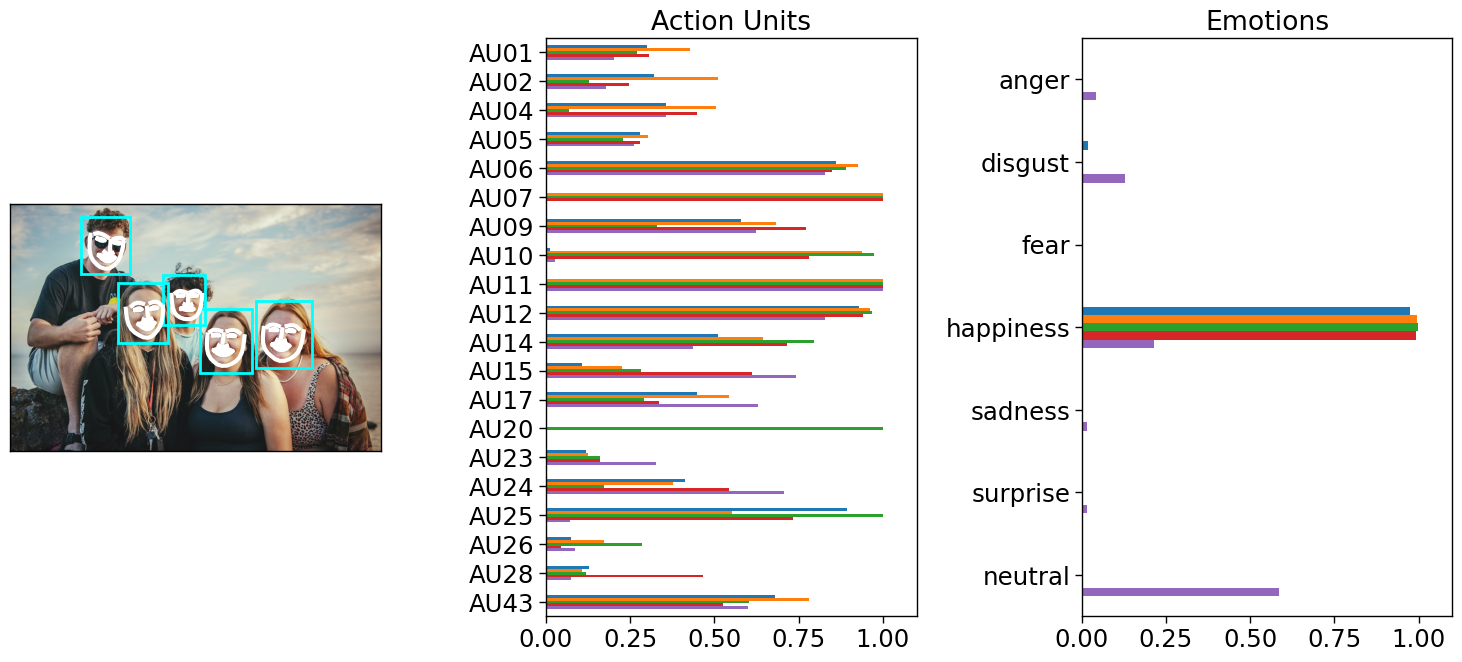

In [24]:
figs = multi_face_image_prediction.plot_detections(add_titles=False)

In [25]:
img_list = [single_face_img_path, multi_face_image_path]
mixed_prediction = detector.detect(img_list, batch_size=1, data_type="image")
mixed_prediction

100%|█████████████████████████████████████████████| 2/2 [00:02<00:00,  1.22s/it]


,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,Identity_508,Identity_509,Identity_510,Identity_511,Identity_512,input,frame,FrameHeight,FrameWidth,Identity
0,163.0,131.0,246.0,307.0,0.999693,188.409531,190.764130,193.926575,197.980225,206.389160,...,0.030200,0.104360,-0.000730,-0.014038,0.044818,/Users/amizukam/anaconda3/envs/fer/lib/python3...,0,562.0,572.0,Person_0
1,663.0,263.0,150.0,180.0,0.998755,683.637024,682.256287,681.580444,682.637024,686.754944,...,-0.030578,0.057009,-0.027664,0.055146,0.074115,/Users/amizukam/anaconda3/envs/fer/lib/python3...,1,667.0,1000.0,Person_1
2,512.0,284.0,140.0,172.0,0.997860,532.246399,530.987976,530.478943,531.346313,534.563416,...,0.020770,0.074040,-0.061894,0.024235,0.058015,/Users/amizukam/anaconda3/envs/fer/lib/python3...,1,667.0,1000.0,Person_2
3,290.0,215.0,135.0,160.0,0.991971,311.675385,313.203674,315.590179,319.633240,326.428802,...,-0.065147,-0.021230,-0.057268,-0.008089,0.035251,/Users/amizukam/anaconda3/envs/fer/lib/python3...,1,667.0,1000.0,Person_3
4,192.0,35.0,131.0,154.0,0.963654,216.397369,214.710068,213.856934,214.397079,217.525269,...,0.040147,0.028400,-0.029841,0.040843,-0.055877,/Users/amizukam/anaconda3/envs/fer/lib/python3...,1,667.0,1000.0,Person_4
5,413.0,193.0,112.0,134.0,0.903046,435.238007,435.729736,436.857910,439.002228,442.800690,...,0.042136,0.047004,-0.001307,0.041147,0.046738,/Users/amizukam/anaconda3/envs/fer/lib/python3...,1,667.0,1000.0,Person_5


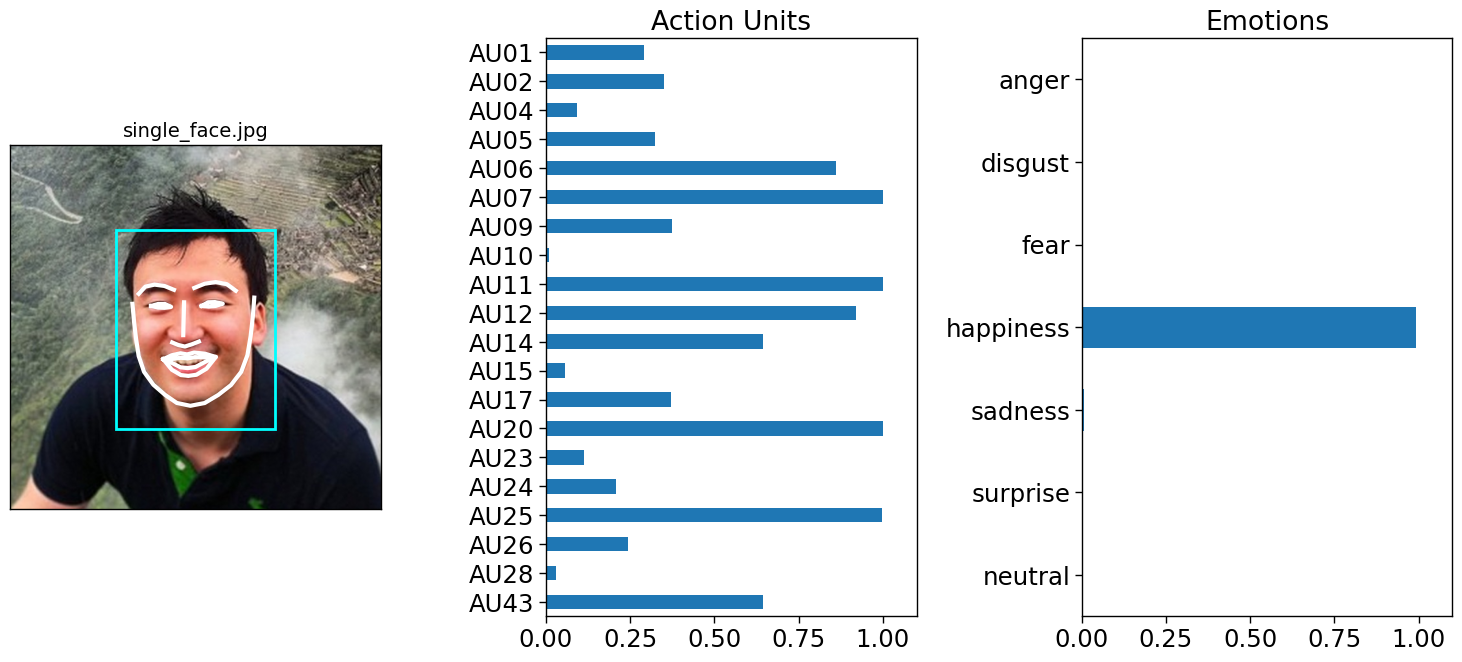

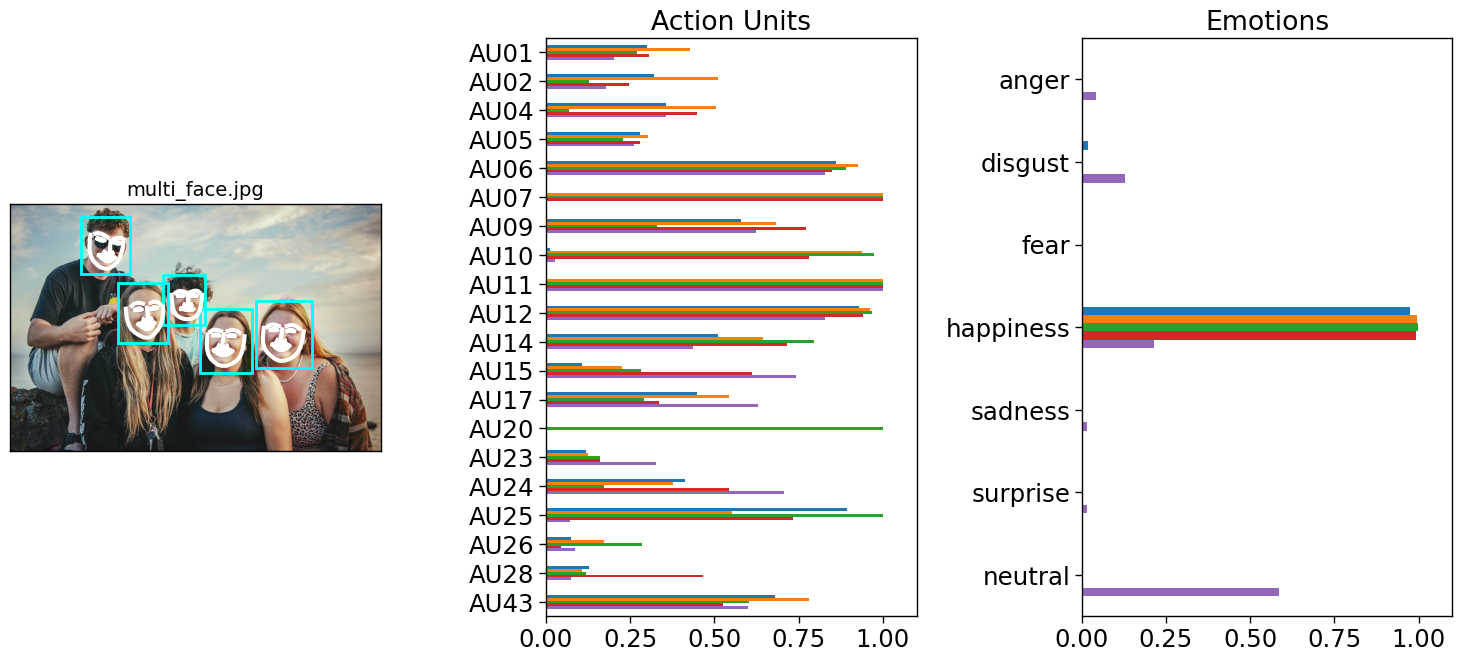

In [26]:
figs = mixed_prediction.plot_detections()

# Detect from Videos

In [27]:
test_video_path = os.path.join(test_data_dir, "WolfgangLanger_Pexels.mp4")

In [28]:
from IPython.core.display import Video

In [29]:
Video(test_video_path, embed=False)

In [30]:
video_prediction = detector.detect(
    test_video_path, data_type="video", skip_frames=24,
    face_detection_threshold=0.95
)
video_prediction.head()

100%|███████████████████████████████████████████| 20/20 [00:19<00:00,  1.01it/s]


,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,Identity_509,Identity_510,Identity_511,Identity_512,input,frame,FrameHeight,FrameWidth,approx_time,Identity
0,307.0,33.0,269.0,327.0,0.997972,330.422302,333.200439,338.313690,346.049591,357.961914,...,-0.047752,-0.006772,0.013241,-0.006375,/Users/amizukam/anaconda3/envs/fer/lib/python3...,0,360.0,640.0,00:00,Person_0
1,329.0,46.0,253.0,314.0,0.997641,346.127106,347.800049,351.786346,358.154510,369.051941,...,-0.076541,0.063415,0.017766,-0.007070,/Users/amizukam/anaconda3/envs/fer/lib/python3...,24,360.0,640.0,00:01,Person_1
2,314.0,21.0,258.0,336.0,0.997934,340.927063,341.121582,343.485046,347.379150,356.129974,...,-0.066493,0.015429,0.023260,0.014124,/Users/amizukam/anaconda3/envs/fer/lib/python3...,48,360.0,640.0,00:02,Person_2
3,314.0,70.0,239.0,290.0,0.985917,315.397034,315.924896,318.986115,325.221039,335.382019,...,-0.057963,0.047913,0.042580,0.043727,/Users/amizukam/anaconda3/envs/fer/lib/python3...,72,360.0,640.0,00:03,Person_3
4,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,0.010204,-0.039508,0.009879,-0.003504,/Users/amizukam/anaconda3/envs/fer/lib/python3...,96,360.0,640.0,00:04,Person_4


In [31]:
video_prediction.shape

(20, 692)

[<Figure size 1500x700 with 3 Axes>, <Figure size 1500x700 with 3 Axes>]

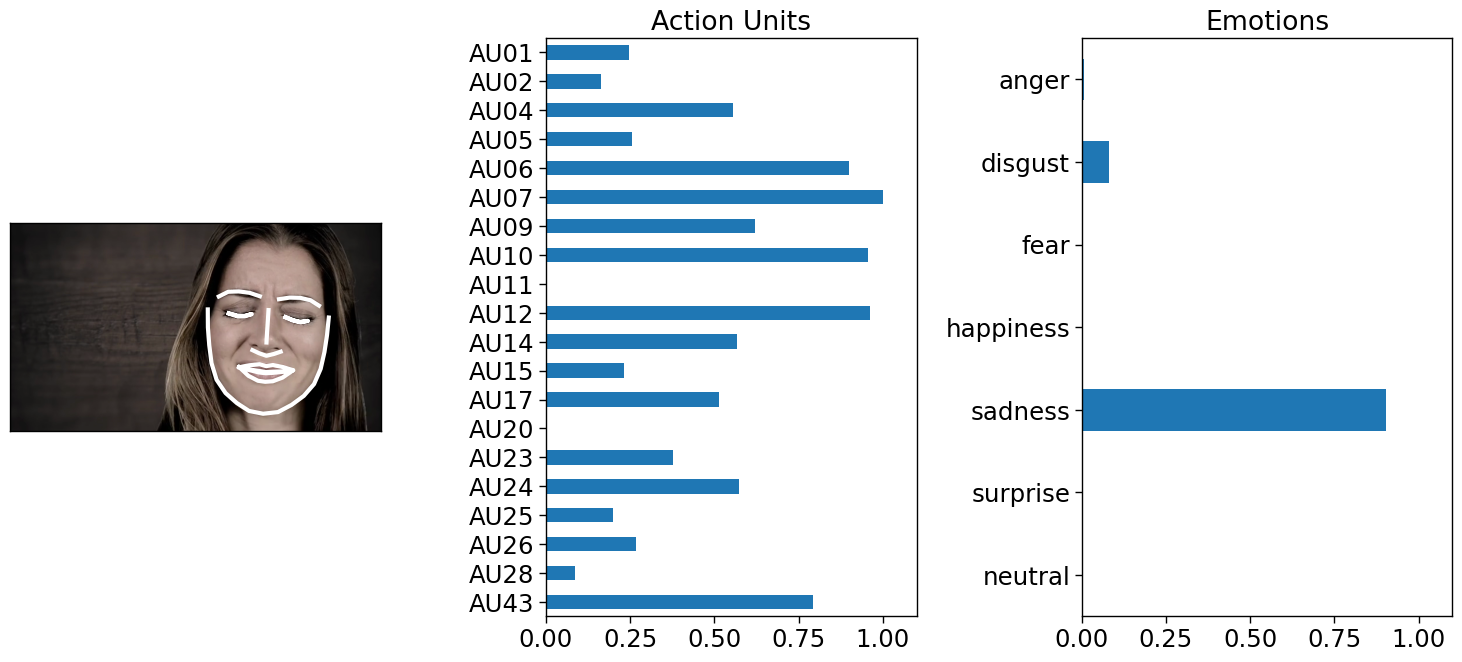

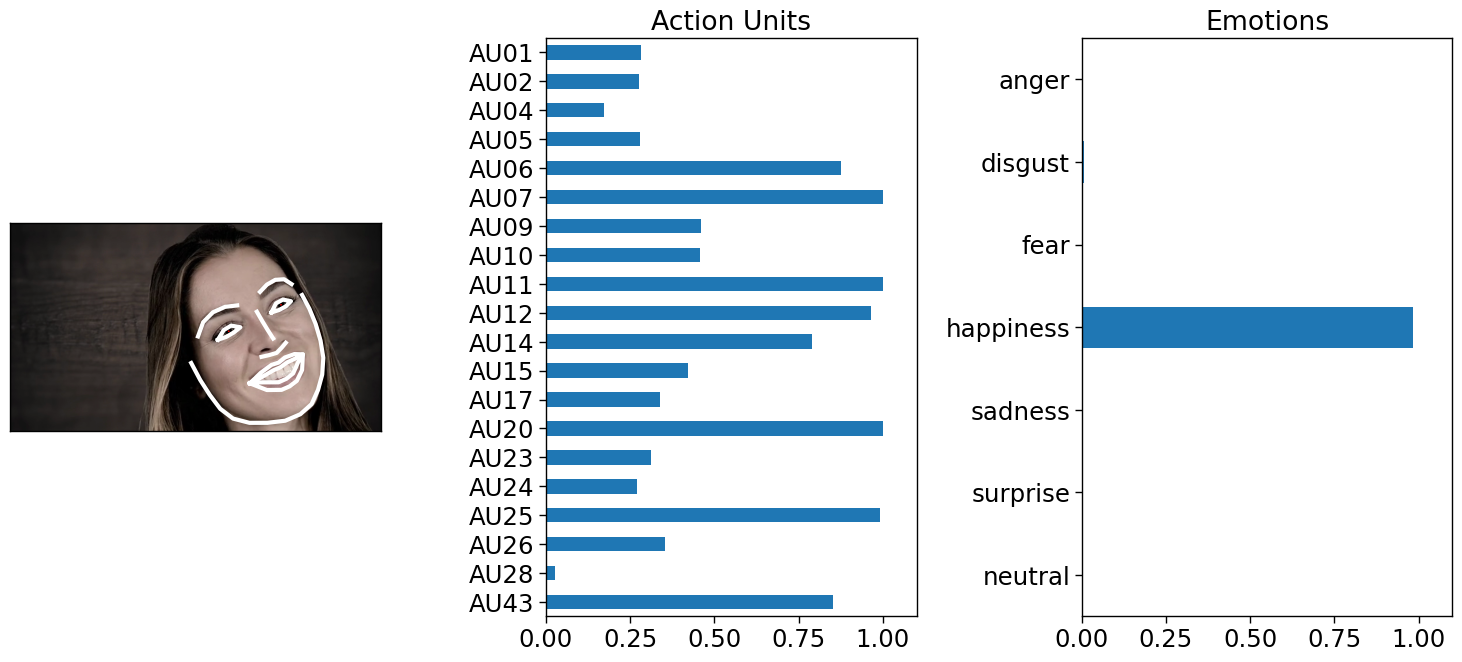

In [32]:
video_prediction.query("frame in [48, 408]").plot_detections(
    faceboxes=False, add_titles=False
)

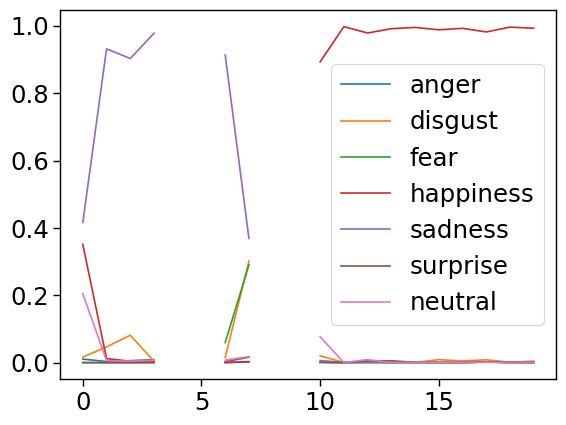

In [33]:
axes = video_prediction.emotions.plot()

# Plotting a neutral face

In [41]:
from feat.plotting import plot_face

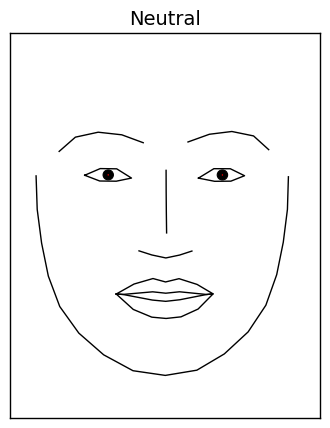

In [42]:
# 20 dimensional vector of AU intensities
# AUs ordered as:
# 1, 2, 4, 5, 6, 7, 9, 11, 12, 14, 15, 17, 20, 23, 24, 25, 26, 28, 43
neutral = np.zeros(20)

ax = plot_face(au=neutral, title="Neutral")